In [7]:
import pandas as pd
import os
import numpy as np
import numpy.ma as ma
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import isotopic_decomposition as utils

In [23]:
# load data

dataPath = os.path.abspath(os.getcwd())

massDistributionsData = pd.read_csv(os.path.join(dataPath, r'Supporting data for D0-D24 calculations.csv'))
massDistributionsData.columns = [c.replace(' ', '_') for c in massDistributionsData.columns]

buildingBlocks = pd.read_csv(os.path.join(dataPath, r'Supporting data for D0-D24 calculations building blocks.csv'))#,dtype={'col':np.float}
for i in range(1,len(buildingBlocks.columns)):
    buildingBlocks.iloc[:,i] = buildingBlocks.iloc[:,i].str.rstrip('%').astype('float') / 100.0
buildingBlocks.fillna(0,inplace=True)

C:\Users\vagol\AppData\Local\Temp\ipykernel_10160\3875029151.py:10: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  buildingBlocks.iloc[:,i] = buildingBlocks.iloc[:,i].str.rstrip('%').astype('float') / 100.0


In [24]:
buildingBlocks

,Unnamed: 0,%D0,%D1,%D2,%D3,%D4,%D5,%D6,%D7,%D8,...,%D15,%D16,%D17,%D18,%D19,%D20,%D21,%D22,%D23,%D24
0,D0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,D2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,D3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,D5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,D6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,D7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,D8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,D9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
buildingBlocks.iloc[:,11]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
Name: %D10, dtype: float64

In [26]:
massDistributionsData

,molecular_formula,mass,abundance
0,C20H26D0N2O5,374.2,100.0
1,C20H26D0N2O5,375.2,22.9
2,C20H26D0N2O5,376.2,3.5
3,C20H26D0N2O5,377.2,0.4
4,C20H25DN2O5,375.2,100.0
...,...,...,...
95,C20H3D23N2O5,400.3,0.4
96,C20H2D24N2O5,398.3,100.0
97,C20H2D24N2O5,399.3,22.6
98,C20H2D24N2O5,400.3,3.5


In [27]:
numberOfUnits, nrOfIngredients, maxNrOfDiffIng = 2,25,2#10,25,10
weightsList = utils.createMixtureWeights(numberOfUnits, nrOfIngredients, maxNrOfDiffIng)
print(len(weightsList))

325


In [56]:
massDistributions = utils.massDistributionOfBuildingBlocks(massDistributionsData, buildingBlocks)
mixturesAll = utils.createAllNormMixtures(massDistributions, weightsList)
mixturesAll1=[mix[0] for mix in mixtures]
print(len(mixturesAll1))
ndpMx = utils.computeNdpMatrix(mixturesAll1)
utils.mxMax(ndpMx,7)

325


0.7827936

(array([3.3540e+04, 1.0186e+04, 1.9650e+03, 8.1000e+01, 2.7000e+01,
        0.0000e+00, 5.3130e+03, 1.5410e+03, 4.6000e+01, 6.0000e+02]),
 array([0.    , 0.0783, 0.1566, 0.2349, 0.3132, 0.3915, 0.4698, 0.5481,
        0.6264, 0.7047, 0.783 ]),
 <BarContainer object of 10 artists>)

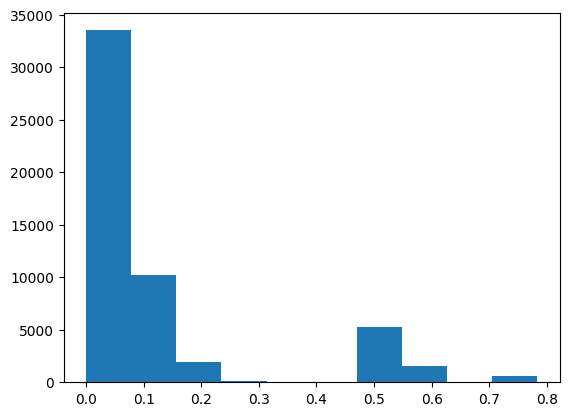

In [57]:
utils.mxHist(ndpMx)

In [36]:
utils.filterIndicesByNdp(ndpMx, 0.7827)

[(209, 171)]

In [37]:
m1=[mixtures1[209]]
m2=[mixtures1[171]]
utils.computeCrossNdpMatrix(m1, m2)

[[0.7827935599363772]]

In [38]:
weightsList[209]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [39]:
weightsList[171]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [48]:
measuredMassDistr = pd.DataFrame([0,0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
measuredMassDistr = measuredMassDistr.apply(lambda x: x/np.linalg.norm(x), axis=0)
measuredMassDistr

,0
0,0.000000
1,0.000000
2,0.707107
3,0.707107
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [52]:
nrOfIngredients = 2
weights = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0,0.5,0,0,0,0,0,0]
neighbors = utils.findNeighbors(weights, nrOfIngredients)
massDistributions = utils.massDistributionOfBuildingBlocks(massDistributionsData, buildingBlocks)#[:nrOfIngredients]

In [53]:
mixtures1 = [utils.createAllNormMixtures(massDistributions, [weights])[0][0]]
mixtures2 = [elem [0] for elem in utils.createAllNormMixtures(massDistributions, neighbors)]
mx = utils.computeCrossNdpMatrix(mixtures1, mixtures2)
utils.mxMax(mx,4)

0.7191

In [58]:
mixtures
mx = utils.computeCrossNdpMatrix(mixturesAll1, [measuredMassDistr.iloc[:,0]])
utils.mxMax(mx,4)

0.981

In [59]:
top5ind = np.argpartition(utils.flatten(mx), -5)[-5:]
top5ind

array([323, 299, 231, 253, 275], dtype=int64)